In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os as os
import rasterio
from sklearn.feature_extraction import image

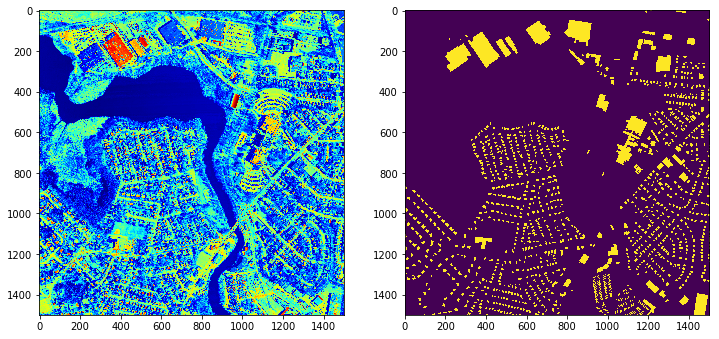

In [52]:
# load input and output images
input_path = 'buildings/input.tiff'
with rasterio.open(input_path) as src:
    inp_all = src.read()
out_path = 'buildings/output.tif'
with rasterio.open(out_path) as src:
    out = src.read()
fig = plt.figure(figsize=(12, 7))
inp_image = np.sum(inp_all, axis = 0)
fig.add_subplot(1, 2, 1)
plt.imshow(inp_image, cmap='jet')
fig.add_subplot(1, 2, 2)
plt.imshow(out[0])

In [102]:
def make_samples(inp_image, out_image, num, size):
    random_state = np.random.randint(0, 1e6, size = 1)[0]
    ipatches = image.extract_patches_2d(inp_image, size, max_patches = num, random_state = random_state)
    opatches = image.extract_patches_2d(out_image, size, max_patches = num, random_state = random_state)
    return ipatches, opatches
    
num_patches = 10
ipatches, opatches = make_samples(inp_image, out[0], num_patches, [300, 300])
np.savez('tiny.npz', inp=ipatches, outp=opatches)

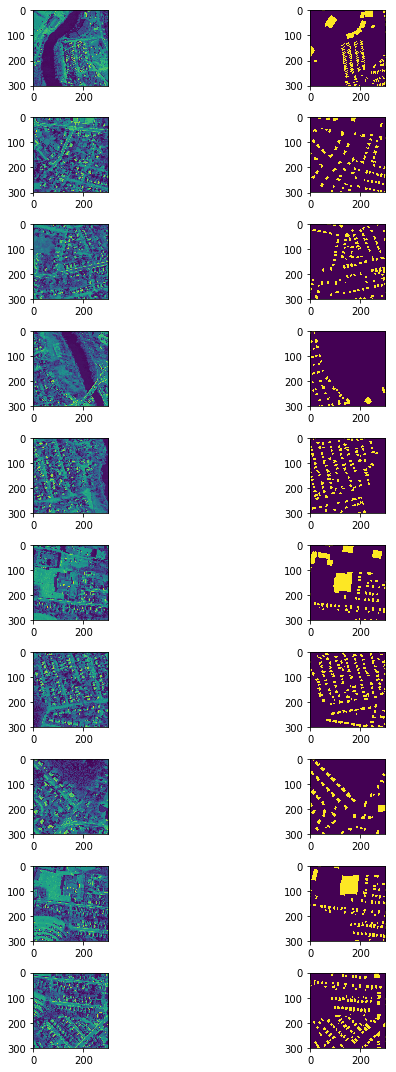

In [103]:
fig = plt.figure(figsize=(10, 15))
for i in range(num_patches * 2):
    fig.add_subplot(num_patches, 2, 1 + i)
    if i%2 == 0:
        plt.imshow(ipatches[int(i / 2), :, :])
    else:
        plt.imshow(opatches[int(i / 2), :, :])
plt.tight_layout()
plt.show()

In [95]:
a = np.load('tiny.npz')

In [96]:

inp = a['arr_0']